In [1]:
import os
from glob import glob
from skimage import data, io, feature, color, exposure
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
%matplotlib inline

# declare functions

In [2]:
lfw2 = os.path.join('..', 'Data', 'lfw2')
def image_path(person, id_, lfw_folder = lfw2):
    return glob(os.path.join(lfw_folder, person, '*' + id_ + '.jpg'))[0]

In [3]:
'''
Parameters: 
    - img_matrix: (ndarray)
    - title: (string)
Output:
    - image plot
'''
def plt_img(img_matrix, title='Image', normalize=False):
    if normalize:
        plt.imshow(img_matrix, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap='gray')
    else:
        io.imshow(img_matrix)
    plt.title(title)
    plt.show()

In [4]:
def plt_two_imgs(img_a, img_b, cmap='gray', normalize=False):
    f = plt.figure(figsize=(12, 8))
    f.add_subplot(1,2, 1)
    if normalize:
        plt.imshow(img_a, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap=cmap)
    else:
        plt.imshow(img_a, cmap=cmap)
    f.add_subplot(1,2, 2)
    if normalize:
        plt.imshow(img_b, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap=cmap)
    else:
        plt.imshow(img_b, cmap=cmap)
    
    plt.show(block=True)
    
    

In [5]:
'''
Parameters: 
- Path: The image should be in the working directory or a full path of image
should be given;
- color: Second argument is a flag which specifies the way image should be read.
    cv2.IMREAD_COLOR : Loads a color image. Any transparency of image
    will be neglected;
    cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode;
    cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel;
Note Instead of these three flags, you can simply pass integers 1, 0 or -1
respectively.
Output:
- img_array: (ndarray)
'''
def open_img(path, color=0):
    return cv2.imread(path, color)

In [6]:
'''
Parameters:
- path_img: A string representing the file name. The filename must include image format like .jpg, .png, etc.

- img: It is the image that is to be saved (ndarray).

Return Value: It returns true if image is saved successfully.
'''

def save_img(path_img, img):
    cv2.imwrite(path_img, img) 

In [7]:
def getDF(path):
    with open(path) as f:
        file_list = f.readlines()
    n = int(file_list[0].strip())
    df_inicial = pd.read_csv(path, sep='\t', skiprows=1, nrows=n, names=['pair_name_1', 'pair_id_1', 'pair_id_2'])
    df_inicial['pair_name_2'] = None
    df_secondary = pd.read_csv(path, sep='\t', skiprows=n+1, names=['pair_name_1', 'pair_id_1', 'pair_name_2', 'pair_id_2'])
    df = pd.concat([df_inicial, df_secondary])
    df = df.reset_index(drop=True)
    print(df.shape)
    return df

In [8]:
def plt_img_batch(df, show=False, limit=np.inf):
    for index, row in df.iterrows():
        plt_img(open_img(row['path_pair_id_1'], color=0), title=os.path.split(row['path_pair_id_1'])[-1].split('.')[0])
        plt_img(open_img(row['path_pair_id_2'], color=0), title=os.path.split(row['path_pair_id_2'])[-1].split('.')[0])
        if limit == index + 1:
            break

# example

In [9]:
# data_folder = os.path.abspath('..\\data\\')
data_folder = os.path.join('..', 'Data')
train_path = Path(data_folder, 'pairsDevTrain.txt')
test_path = Path(data_folder, 'pairsDevTest.txt')

In [10]:
df_train = getDF(train_path)
df_test = getDF(test_path)

(2200, 4)
(1000, 4)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [11]:
df_train['path_pair_id_1'] = df_train.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_1'])), axis=1)
df_train['path_pair_id_2'] = df_train.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_2'])) if x['pair_name_2']==None 
                                            else image_path(person=x['pair_name_2'], id_= str(x['pair_id_2'])), axis=1)

df_test['path_pair_id_1'] = df_test.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_1'])), axis=1)
df_test['path_pair_id_2'] = df_test.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_2'])) if x['pair_name_2']==None 
                                          else image_path(person=x['pair_name_2'], id_= str(x['pair_id_2'])), axis=1)

In [12]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg


In [13]:
df_test.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2
0,13,14,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0014.jpg
1,13,16,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0016.jpg
2,1,2,Abdullatif_Sener,None,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...
3,1,3,Adel_Al-Jubeir,None,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...
4,1,2,Al_Pacino,None,..\Data\lfw2\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2\Al_Pacino\Al_Pacino_0002.jpg


## One image

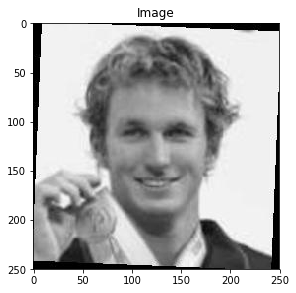

In [14]:
# plt_image method receives a ndarray (Figure)
plt_img(open_img(df_train.loc[0, 'path_pair_id_1'], color=0))

## Batch image

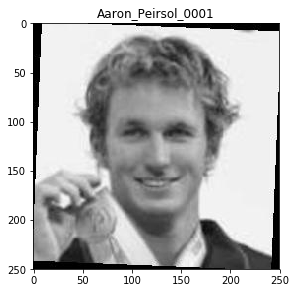

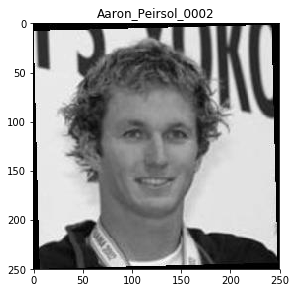

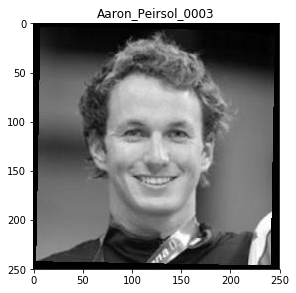

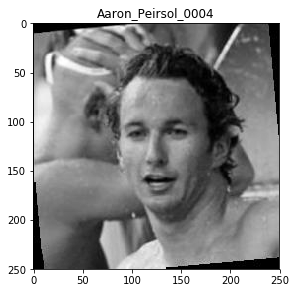

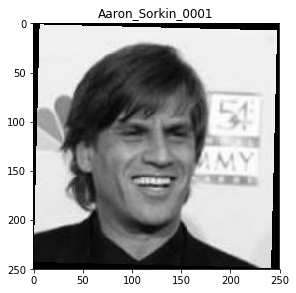

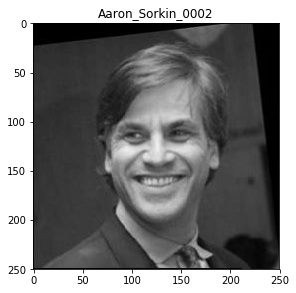

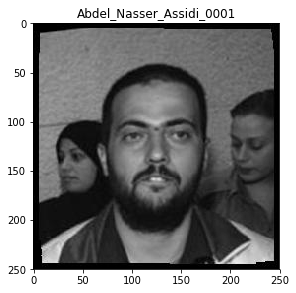

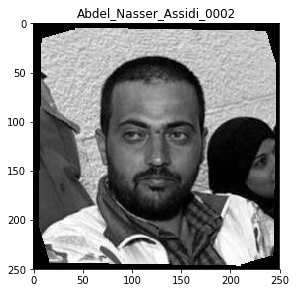

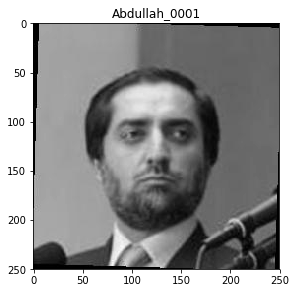

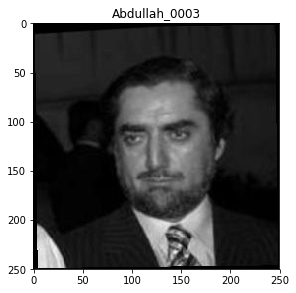

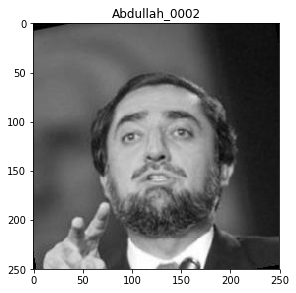

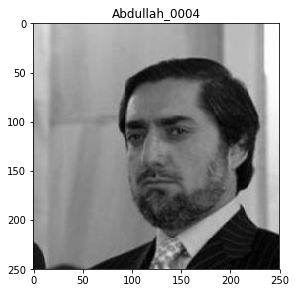

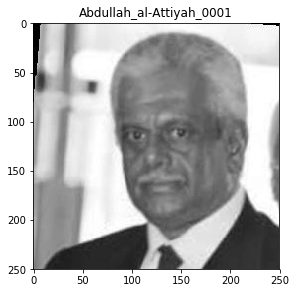

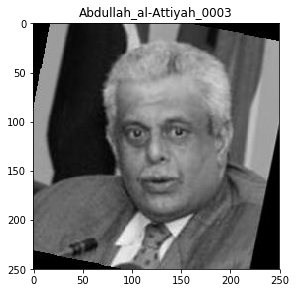

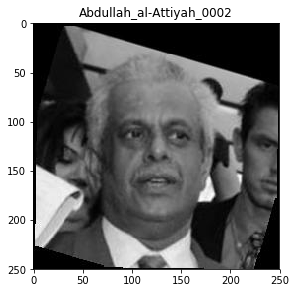

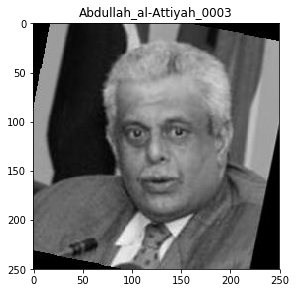

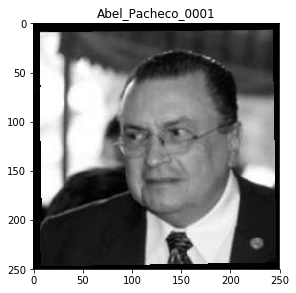

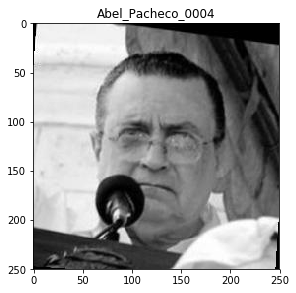

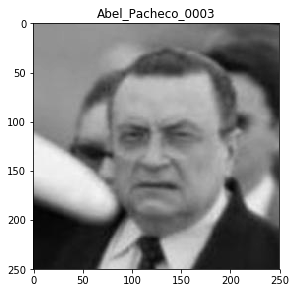

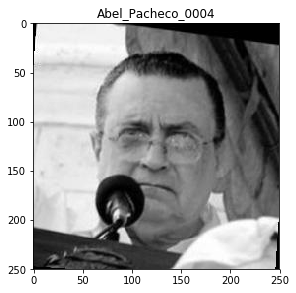

In [15]:
plt_img_batch(df=df_train, limit=10)

# Viola Jones

In [16]:
def plot_rectangle(detected_faces, image, title='Image', cmap_type='gray', kwargs={'lw': 20.}):
    # Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(image, cmap=cmap_type)
    plt.title(title)
    for (column, row, width, height) in detected_faces:
        rect = Rectangle(
                (column, row),
                width = width,
                height = height,
                fill=False,
                edgecolor='r',
                
                )
        # Add the patch to the Axes
        ax.add_patch(rect)
#     plt.axis('off')
    plt.show()

In [17]:
def crop_image(original_image, column, row, width, height):
    # the goal is crop the biggest area
    return original_image[row:row+height, column:column + width]


### Load the classifier and create a cascade object for face detection

In [18]:
cascade_path = os.path.join('..', 'haarcascades', 'haarcascade_frontalface_alt.xml')
face_cascade = cv2.CascadeClassifier(cascade_path)

## Image with one face

In [19]:
original_image = open_img(df_train.loc[0, 'path_pair_id_1'], color=0)
grayscale_image = original_image.copy()

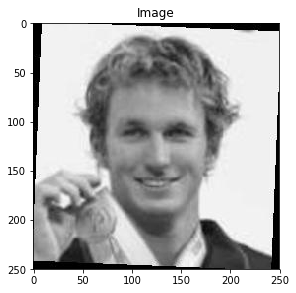

In [20]:
plt_img(original_image)

In [21]:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

In [22]:
# (column, row, width, height)
detected_faces

array([[ 63,  63, 127, 127]], dtype=int32)

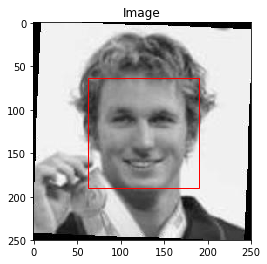

In [23]:
# Plot: area with facial recognition 
plot_rectangle(detected_faces, grayscale_image)

In [24]:
column, row, width, height = detected_faces[0]
cropped_image = crop_image(original_image=original_image, column=column, row=row, 
                           width=width, height=height)

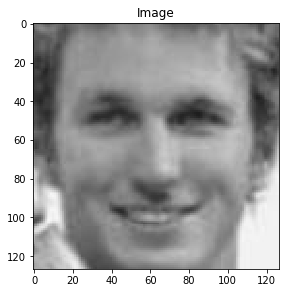

In [25]:
plt_img(cropped_image)

In [26]:
cropped_image.shape

(127, 127)

## Image with two or more faces

In [27]:
original_image = open_img(df_train.loc[3, 'path_pair_id_1'], color=0)
grayscale_image = original_image.copy()

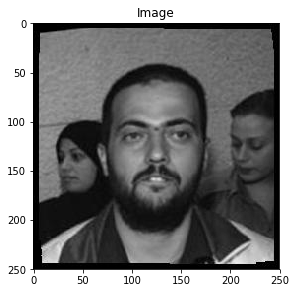

In [28]:
plt_img(original_image)

In [29]:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

In [30]:
# ndarray with more than one row
detected_faces

array([[ 66,  66, 118, 118],
       [ 12, 117,  51,  51],
       [185, 101,  60,  60]], dtype=int32)

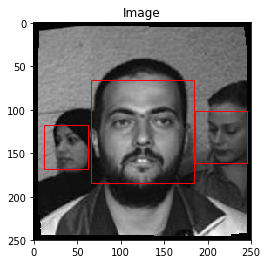

In [31]:
plot_rectangle(detected_faces, grayscale_image)

### Plot 1º rectangle

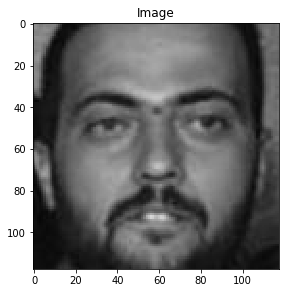

In [32]:
cropped_image = crop_image(original_image=original_image, column=detected_faces[0,0], row=detected_faces[0,1], 
                           width=detected_faces[0,2], height=detected_faces[0,3])

plt_img(cropped_image)

### Plot 2º rectangle

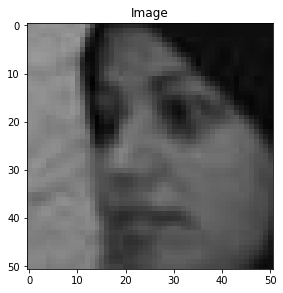

In [33]:
cropped_image = crop_image(original_image=original_image, column=detected_faces[1,0], row=detected_faces[1,1], 
                           width=detected_faces[1,2], height=detected_faces[1,3])

plt_img(cropped_image)

### Plot 3º rectangle

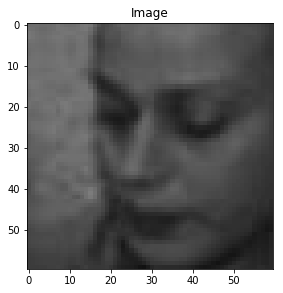

In [34]:
cropped_image = crop_image(original_image=original_image, column=detected_faces[2,0], row=detected_faces[2,1], 
                           width=detected_faces[2,2], height=detected_faces[2,3])

plt_img(cropped_image)

## Problem: what image to use?
### Response: Use the biggest area

In [35]:
def crop_biggest_area(original_image, detected_faces):
    
    # the goal is crop the biggest area
    if len(detected_faces) == 0: # viola jones didnt recognize any face
        return original_image, (None, None, original_image.shape[0], original_image.shape[1])
    else:
        # detected_faces returns: column, row, width, height
        # So, assuming all width == height
        # get np.argmax of height
        id_max_max_width = np.argmax(detected_faces[:, -1])
        column, row, width, height = detected_faces[id_max_max_width]
        return crop_image(original_image, column, row, width, height), (column, row, width, height)

In [36]:
cropped_image, _ = crop_biggest_area(original_image, detected_faces)

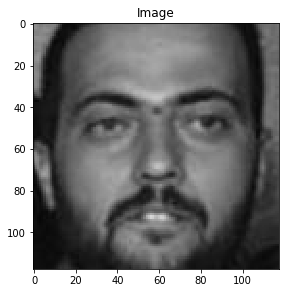

In [37]:
plt_img(cropped_image)

In [38]:
cropped_image.shape

(118, 118)

## Problem: images with differents shapes
### Response: Use the resize methods. So, cropped all images, then used resize methods to get a standard shape

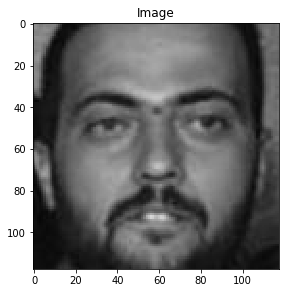

In [39]:
plt_img(cropped_image)

In [40]:
cropped_image.shape

(118, 118)

In [41]:
# UP dimension
width = 350
height = 350
dim = (width, height)
# resize image
resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)

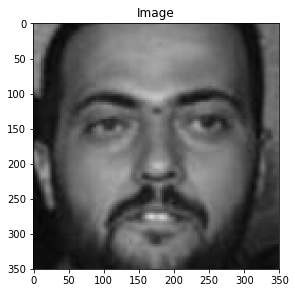

In [42]:
plt_img(resized)

In [43]:
# Down dimension
width = 70
height = 70
dim = (width, height)
# resize image
resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)

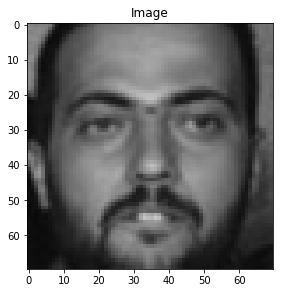

In [44]:
plt_img(resized)

### Update df_train and df_test

In [45]:
df_train['path_pair_id_1_cropped'] = df_train['path_pair_id_1'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_train['path_pair_id_1_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

df_train['path_pair_id_2_cropped'] = df_train['path_pair_id_2'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_train['path_pair_id_2_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

In [46]:
df_test['path_pair_id_1_cropped'] = df_test['path_pair_id_1'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_test['path_pair_id_1_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

df_test['path_pair_id_2_cropped'] = df_test['path_pair_id_2'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_test['path_pair_id_2_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

In [47]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0001.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0003.jpg


In [48]:
df_test.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,13,14,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0014.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
1,13,16,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0016.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
2,1,2,Abdullatif_Sener,None,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...
3,1,3,Adel_Al-Jubeir,None,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...
4,1,2,Al_Pacino,None,..\Data\lfw2\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2\Al_Pacino\Al_Pacino_0002.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0002.jpg


# Apply preprocessing for all images (run only if necessary)

## Apply preprocessing

In [ ]:
def preprocessing(path_image, path_to_save, dim=(100, 100)):
    original_image = open_img(path_image, color=0)
    grayscale_image = original_image.copy()
    detected_faces = face_cascade.detectMultiScale(grayscale_image)
    cropped_image, (column, row, width, height) = crop_biggest_area(original_image, detected_faces)
    resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)
    save_img(path_img=path_to_save, img=resized)
    return (column, row, width, height)

### get dimensions VJ and apply pre-processing

In [ ]:
df_train['VJ_pair_id_1'] = df_train.apply(lambda x: preprocessing(path_image=x['path_pair_id_1'], path_to_save=x['path_pair_id_1_cropped']), axis=1)
df_train['VJ_pair_id_2'] = df_train.apply(lambda x: preprocessing(path_image=x['path_pair_id_2'], path_to_save=x['path_pair_id_2_cropped']), axis=1)

df_test['VJ_pair_id_1'] = df_test.apply(lambda x: preprocessing(path_image=x['path_pair_id_1'], path_to_save=x['path_pair_id_1_cropped']), axis=1)
df_test['VJ_pair_id_2'] = df_test.apply(lambda x: preprocessing(path_image=x['path_pair_id_2'], path_to_save=x['path_pair_id_2_cropped']), axis=1)

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
aux = df_train['VJ_pair_id_1'].apply(lambda x: x[-1])
heights = pd.concat([aux, df_train['VJ_pair_id_2'].apply(lambda x: x[-1])], ignore_index=True)

In [ ]:
np.mean(heights)

In [ ]:
np.median(height)

In [ ]:
sns.distplot(heights)

# Histogram of Oriented Gradients
## create features vector

Parameters:
image(M, N[, C]) ndarray
Input image.

orientationsint, optional
Number of orientation bins.

pixels_per_cell2-tuple (int, int), optional
Size (in pixels) of a cell.

cells_per_block2-tuple (int, int), optional
Number of cells in each block.

block_norm str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
Block normalization method:

visualizebool, optional
Also return an image of the HOG. For each cell and orientation bin, the image contains a line segment that is centered at the cell center, is perpendicular to the midpoint of the range of angles spanned by the orientation bin, and has intensity proportional to the corresponding histogram value.

transform_sqrtbool, optional
Apply power law compression to normalize the image before processing. DO NOT use this if the image contains negative values. Also see notes section below.

feature_vectorbool, optional
Return the data as a feature vector by calling .ravel() on the result just before returning.

multichannelboolean, optional
If True, the last image dimension is considered as a color channel, otherwise as spatial.

Returns:
out(n_blocks_row, n_blocks_col, n_cells_row, n_cells_col, n_orient) ndarray
HOG descriptor for the image. If feature_vector is True, a 1D (flattened) array is returned.

hog_image(M, N) ndarray, optional
A visualisation of the HOG image. Only provided if visualize is True.


Default parameters:
    (image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False, feature_vector=True, multichannel=None)

In [ ]:
# https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.hog
# https://www.learnopencv.com/histogram-of-oriented-gradients/
# https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html
# https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

In [49]:
path_test_image = df_train.loc[1, 'path_pair_id_1_cropped']
print(path_test_image)
test_image = open_img(path=path_test_image)
print(test_image.shape)

..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirsol_0003.jpg
(100, 100)


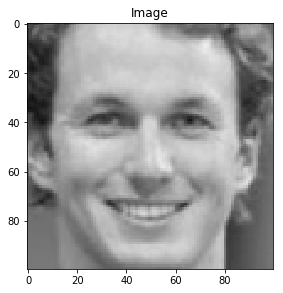

In [50]:
plt_img(test_image)

(8100,)


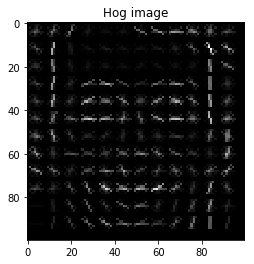

In [51]:
# Default
hog_vec, hog_vis = feature.hog(test_image, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(3, 3),
                               block_norm='L2-Hys', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

(4356,)


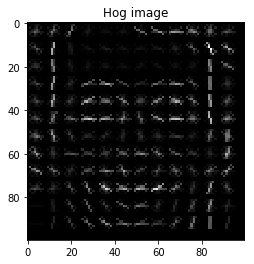

In [52]:
# Alter cells_per_block=(2,2) and block_norm=L1 like paper:
#https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf
hog_vec, hog_vis = feature.hog(test_image, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

(1296,)


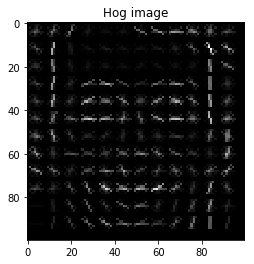

In [53]:
# Alter cells_per_block=(1,1)
hog_vec, hog_vis = feature.hog(test_image, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

### Testes reduzindo a imagem

In [54]:
resized = cv2.resize(test_image, (80,80), interpolation = cv2.INTER_AREA)

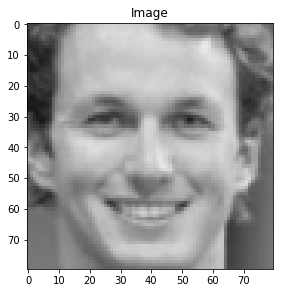

In [55]:
plt_img(resized)

(5184,)


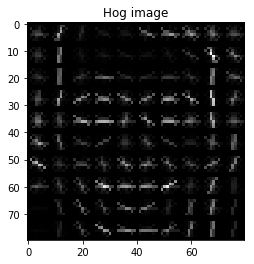

In [56]:
# Default parameters
hog_vec, hog_vis = feature.hog(resized, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(3, 3),
                               block_norm='L2-Hys', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

(900,)


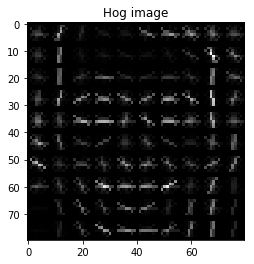

In [57]:
# Alter cells_per_block and block_norm=L1 like paper 
hog_vec, hog_vis = feature.hog(resized, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec.shape)
plt_img(hog_vis, title='Hog image', normalize=True)

## Compare two images

In [269]:
path_test_image1 = df_train.loc[0, 'path_pair_id_1_cropped']
print(path_test_image1)
test_image1 = open_img(path=path_test_image1)
print(test_image1.shape)

path_test_image2 = df_train.loc[0, 'path_pair_id_2_cropped']
print(path_test_image2)
test_image2 = open_img(path=path_test_image2)
print(test_image2.shape)

..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirsol_0001.jpg
(100, 100)
..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirsol_0002.jpg
(100, 100)


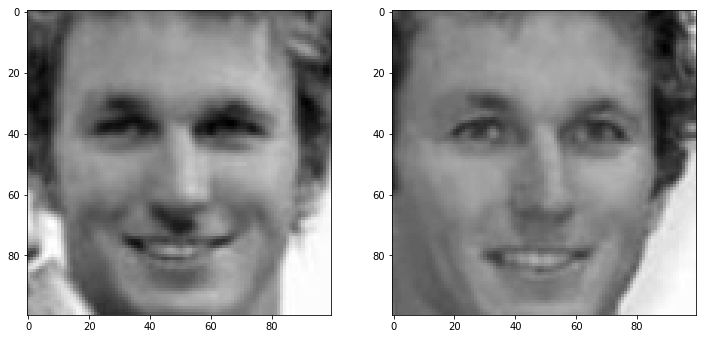

In [270]:
plt_two_imgs(test_image1, test_image2)

In [271]:
# Alter cells_per_block =(1,1)
hog_vec_1, hog_vis_1 = feature.hog(test_image1, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec_1.shape)
hog_vec_1

(1296,)


array([0.10045122, 0.04723528, 0.00452764, ..., 0.02651619, 0.12577734,
       0.05929201])

In [272]:
# Alter cells_per_block =(1,1)
hog_vec_2, hog_vis_2 = feature.hog(test_image2, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec_2.shape)
hog_vec_2

(1296,)


array([0.24029718, 0.08975598, 0.03011371, ..., 0.00514777, 0.02441802,
       0.17796108])

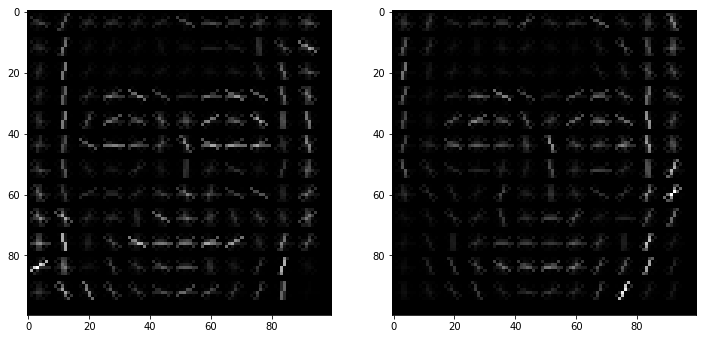

In [273]:
plt_two_imgs(img_a=hog_vis_1, img_b=hog_vis_2)

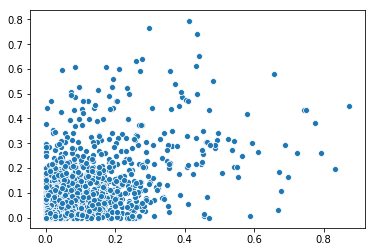

In [274]:
sns.scatterplot(hog_vec_1, hog_vec_2)

### Outro exemplo

In [275]:
path_test_image1 = df_train.loc[21, 'path_pair_id_1_cropped']
print(path_test_image1)
test_image1 = open_img(path=path_test_image1)
print(test_image1.shape)

path_test_image2 = df_train.loc[21, 'path_pair_id_2_cropped']
print(path_test_image2)
test_image2 = open_img(path=path_test_image2)
print(test_image2.shape)

..\Data\lfw2_cropped\Akhmed_Zakayev\Akhmed_Zakayev_0002.jpg
(100, 100)
..\Data\lfw2_cropped\Akhmed_Zakayev\Akhmed_Zakayev_0003.jpg
(100, 100)


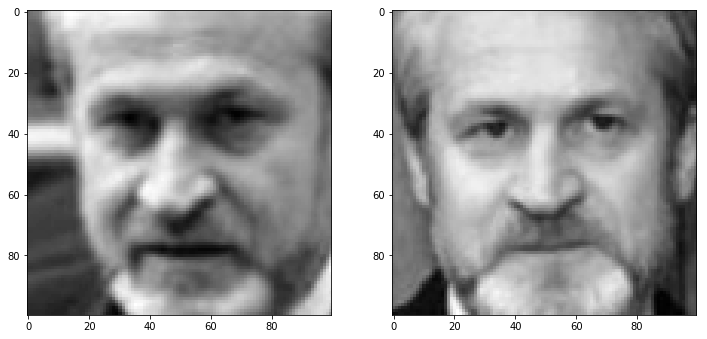

In [276]:
plt_two_imgs(test_image1, test_image2)

In [278]:
# Alter cells_per_block =(1,1)
hog_vec_1, hog_vis_1 = feature.hog(test_image1, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec_1.shape)
hog_vec_1

(1296,)


array([0.13090708, 0.00685377, 0.00247116, ..., 0.00937502, 0.02291867,
       0.02330189])

In [279]:
# Alter cells_per_block =(1,1)
hog_vec_2, hog_vis_2 = feature.hog(test_image2, orientations=9, 
                               pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                               block_norm='L1', visualize=True, transform_sqrt=False, 
                               feature_vector=True, multichannel=False)
print(hog_vec_2.shape)
hog_vec_2

(1296,)


array([0.46587546, 0.17758853, 0.        , ..., 0.11268951, 0.25769746,
       0.16439503])

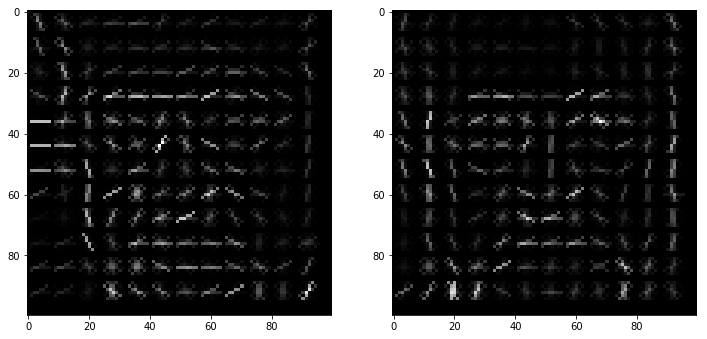

In [280]:
plt_two_imgs(img_a=hog_vis_1, img_b=hog_vis_2)

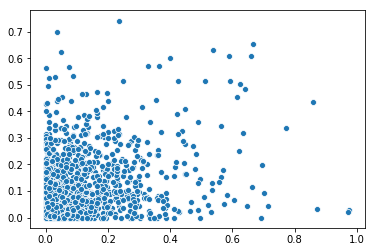

In [281]:
sns.scatterplot(hog_vec_1, hog_vec_2)

# Experiments

## HOG (1,1)

#### Build dataset from hog_vec_1 and hog_vec_2

#### Df_train

In [433]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0001.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0003.jpg


In [434]:
X_train_1 = np.array([feature.hog(open_img(img_1), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_1 in df_train.loc[:,'path_pair_id_1_cropped'].values])

In [435]:
X_train_2= np.array([feature.hog(open_img(img_2), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_2 in df_train.loc[:,'path_pair_id_2_cropped'].values])

In [436]:
X_train = np.append(X_train_1, X_train_2, axis=1)

In [437]:
X_train.shape

(2200, 2592)

In [438]:
y_train = np.array([[1 if par==None else 0 for par in df_train.loc[:,'pair_name_2'].values]]).T

In [439]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 1100, 1: 1100}

#### Df_test

In [440]:
df_test.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,13,14,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0014.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
1,13,16,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0016.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
2,1,2,Abdullatif_Sener,None,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...
3,1,3,Adel_Al-Jubeir,None,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...
4,1,2,Al_Pacino,None,..\Data\lfw2\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2\Al_Pacino\Al_Pacino_0002.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0002.jpg


In [441]:
X_test_1 = np.array([feature.hog(open_img(img_1), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_1 in df_test.loc[:,'path_pair_id_1_cropped'].values])

In [442]:
X_test_2= np.array([feature.hog(open_img(img_2), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_2 in df_test.loc[:,'path_pair_id_2_cropped'].values])

In [443]:
X_test = np.append(X_test_1, X_test_2, axis=1)

In [444]:
X_test.shape

(1000, 2592)

In [445]:
y_test = np.array([[1 if par==None else 0 for par in df_test.loc[:,'pair_name_2'].values]]).T

In [446]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 500, 1: 500}

## SVM

In [351]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [356]:
param_grid = [
  {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250], 'kernel': ['linear']},
  {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'kernel': ['poly']},
 ]
grid = GridSearchCV(SVC(), scoring='accuracy', n_jobs=-1, param_grid=param_grid, verbose=100)
grid.fit(X, y_d)

Fitting 5 folds for each of 169 candidates, totalling 845 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Memmapping (shape=(2200, 2592), dtype=float64) to new file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling a

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:  1.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:  1.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:  4.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  4.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  4.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:  6.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  6.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  7.1min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  8.4min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:  8.4min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:  9.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 11.6min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed: 11.6min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed: 14.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed: 14.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 127 tasks      | elapsed: 14.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed: 16.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed: 16.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 167 tasks      | elapsed: 18.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 18.9min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed: 19.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed: 21.2min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed: 21.2min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed: 21.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed: 21.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 211 tasks      | elapsed: 21.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed: 21.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed: 21.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed: 21.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed: 21.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed: 23.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 255 tasks      | elapsed: 23.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed: 23.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 26.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 26.4min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 26.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed: 28.9min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed: 29.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 299 tasks      | elapsed: 29.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed: 31.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 319 tasks      | elapsed: 31.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed: 31.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 339 tasks      | elapsed: 34.1min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed: 34.1min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 34.2min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed: 36.5min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 36.6min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 362 tasks      | elapsed: 36.9min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed: 39.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 382 tasks      | elapsed: 39.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 383 tasks      | elapsed: 39.4min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 41.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 41.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 41.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 423 tasks      | elapsed: 44.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed: 44.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed: 44.4min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed: 46.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 445 tasks      | elapsed: 46.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 47.2min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed: 49.2min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed: 49.6min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 467 tasks      | elapsed: 49.6min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed: 52.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 487 tasks      | elapsed: 52.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 52.1min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 507 tasks      | elapsed: 54.4min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 54.5min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 509 tasks      | elapsed: 54.5min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed: 56.9min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed: 56.9min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed: 57.2min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed: 59.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed: 59.6min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 551 tasks      | elapsed: 59.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed: 62.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 571 tasks      | elapsed: 62.1min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 572 tasks      | elapsed: 62.1min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 591 tasks      | elapsed: 64.5min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed: 64.6min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 593 tasks      | elapsed: 64.6min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed: 67.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 613 tasks      | elapsed: 67.0min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 614 tasks      | elapsed: 67.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 633 tasks      | elapsed: 69.4min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed: 69.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 635 tasks      | elapsed: 69.8min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 655 tasks      | elapsed: 72.2min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed: 72.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed: 74.6min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed: 74.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed: 74.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed: 77.1min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 697 tasks      | elapsed: 77.1min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 77.5min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 717 tasks      | elapsed: 79.5min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed: 79.9min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 719 tasks      | elapsed: 79.9min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed: 82.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 739 tasks      | elapsed: 82.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed: 82.4min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 759 tasks      | elapsed: 84.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed: 84.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 761 tasks      | elapsed: 84.7min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed: 87.1min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 781 tasks      | elapsed: 87.2min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 782 tasks      | elapsed: 87.5min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed: 89.5min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed: 89.9min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed: 89.9min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

[Parallel(n_jobs=-1)]: Done 822 tasks      | elapsed: 92.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 823 tasks      | elapsed: 92.3min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-c92f45ab142d45cea3053279fe02bfb1.pkl
Pickling array (shape=(2200, 1), dtype=int32).
Pickling array (shape=(1760,), dtype=int32).
Pickling array (shape=(440,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed: 92.4min
Memmapping (shape=(2200, 2592), dtype=float64) to old file C:\Users\Rodolfo\AppData\Local\Temp\joblib_memmapping_folder_18816_869449400\18816-3005627464224-

C:\Users\Rodolfo\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200,
                                250],
                          'kernel': ['linear']},
                         {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200,
                                250],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200,
                                250],
                          'degree': [1, 2, 3

In [363]:
grid.best_score_

0.6195454545454545

In [364]:
grid.best_params_

{'C': 0.1, 'degree': 10, 'kernel': 'poly'}

In [365]:
best_clf = grid.best_estimator_

In [366]:
best_clf.fit(X, y_d)


C:\Users\Rodolfo\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [367]:
y_pred = best_clf.predict(X_test)

In [368]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.551

In [378]:
y_pred==np.squeeze(y_test)

array([False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False, False,  True, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False, False,
        True, False,

# MLP

In [379]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [403]:
parameters = {'solver': ['sgd'], 'max_iter': [1000, 1500, 2000 ], 
              'alpha': 10.0 ** -np.arange(1, 6), 'hidden_layer_sizes':np.arange(10, 100, 5), 'activation':['logistic']}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf.fit(X, y_d)

C:\Users\Rodolfo\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['logistic'],
                         'alpha': array([1.e-01, 1.e-0

In [404]:
clf.best_score_

0.5340909090909091

In [405]:
clf.best_params_

{'activation': 'logistic',
 'alpha': 0.001,
 'hidden_layer_sizes': 75,
 'max_iter': 2000,
 'solver': 'sgd'}

In [406]:
best_clf_ = clf.best_estimator_

In [407]:
best_clf_

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=75, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [408]:
best_clf_.fit(X, y_d)

C:\Users\Rodolfo\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=75, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [409]:
y_pred_ = best_clf_.predict(X_test)

In [410]:
accuracy_score(y_true=y_test, y_pred=y_pred_)

0.522

In [411]:
y_pred_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

## HOG = (2,2)

#### Df_train

In [412]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0001.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0003.jpg


In [413]:
X_train_1 = np.array([feature.hog(open_img(img_1), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_1 in df_train.loc[:,'path_pair_id_1_cropped'].values])

In [414]:
X_train_2= np.array([feature.hog(open_img(img_2), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_2 in df_train.loc[:,'path_pair_id_2_cropped'].values])

In [415]:
X_train = np.append(X_train_1, X_train_2, axis=1)

In [416]:
X_train.shape

(2200, 8712)

In [417]:
y_train = np.array([[1 if par==None else 0 for par in df_train.loc[:,'pair_name_2'].values]]).T

In [418]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 1100, 1: 1100}

#### Df_test

In [419]:
df_test.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,13,14,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0014.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
1,13,16,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0016.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
2,1,2,Abdullatif_Sener,None,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...
3,1,3,Adel_Al-Jubeir,None,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...
4,1,2,Al_Pacino,None,..\Data\lfw2\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2\Al_Pacino\Al_Pacino_0002.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0002.jpg


In [420]:
X_test_1 = np.array([feature.hog(open_img(img_1), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_1 in df_test.loc[:,'path_pair_id_1_cropped'].values])

In [421]:
X_test_2= np.array([feature.hog(open_img(img_2), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_2 in df_test.loc[:,'path_pair_id_2_cropped'].values])

In [422]:
X_test = np.append(X_test_1, X_test_2, axis=1)

In [423]:
X_test.shape

(1000, 8712)

In [424]:
y_test = np.array([[1 if par==None else 0 for par in df_test.loc[:,'pair_name_2'].values]]).T

In [425]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 500, 1: 500}

## SVM

In [426]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [427]:
param_grid = [
  {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250], 'kernel': ['linear']},
  {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250], 'degree': np.arange(1, 21, 1), 'kernel': ['poly']},
 ]
grid = GridSearchCV(SVC(), scoring='accuracy', n_jobs=-1, param_grid=param_grid, verbose=10)
grid.fit(X, y_d)

Fitting 5 folds for each of 299 candidates, totalling 1495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 17

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200,
                                250],
                          'kernel': ['linear']},
                         {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200,
                                250],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200,
                                250],
                          'degree': array([ 

In [428]:
grid.best_score_

0.6195454545454545

In [458]:
grid.best_params_

{'C': 0.1, 'degree': 10, 'kernel': 'poly'}

In [459]:
best_clf = grid.best_estimator_

In [460]:
best_clf.fit(X, y_d)


C:\Users\Rodolfo\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [461]:
y_pred = best_clf.predict(X_test)

In [462]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.551

In [463]:
y_pred==np.squeeze(y_test)

array([False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False, False,  True, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False, False,
        True, False,

In [464]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

# MLP

In [465]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [466]:
parameters = {'solver': ['sgd'], 'max_iter': [1000, 1500, 2000, 2500, 5000], 
              'alpha': 10.0 ** -np.arange(1, 6), 'hidden_layer_sizes':np.arange(10, 100, 5), 'activation':['logistic']}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=10)


In [467]:
clf.fit(X, y_d)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['logistic'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05]),
                         'hidden_layer_sizes': a

In [468]:
clf.best_score_

0.5277272727272727

In [469]:
clf.best_params_

{'activation': 'logistic',
 'alpha': 0.001,
 'hidden_layer_sizes': 40,
 'max_iter': 1500,
 'solver': 'sgd'}

In [470]:
best_clf_ = clf.best_estimator_
best_clf_

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=40, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [471]:
best_clf_.fit(X, y_d)

C:\Users\Rodolfo\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=40, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [472]:
y_pred_ = best_clf_.predict(X_test)

In [473]:
accuracy_score(y_true=y_test, y_pred=y_pred_)

0.497

In [474]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

## HOG = (3,3)

#### Df_train

In [475]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0001.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0003.jpg


In [476]:
X_train_1 = np.array([feature.hog(open_img(img_1), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_1 in df_train.loc[:,'path_pair_id_1_cropped'].values])

In [477]:
X_train_2= np.array([feature.hog(open_img(img_2), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_2 in df_train.loc[:,'path_pair_id_2_cropped'].values])

In [478]:
X_train = np.append(X_train_1, X_train_2, axis=1)

In [479]:
X_train.shape

(2200, 16200)

In [480]:
y_train = np.array([[1 if par==None else 0 for par in df_train.loc[:,'pair_name_2'].values]]).T

In [481]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 1100, 1: 1100}

#### Df_test

In [482]:
df_test.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,13,14,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0014.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
1,13,16,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0016.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
2,1,2,Abdullatif_Sener,None,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...
3,1,3,Adel_Al-Jubeir,None,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...
4,1,2,Al_Pacino,None,..\Data\lfw2\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2\Al_Pacino\Al_Pacino_0002.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0002.jpg


In [483]:
X_test_1 = np.array([feature.hog(open_img(img_1), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_1 in df_test.loc[:,'path_pair_id_1_cropped'].values])

In [484]:
X_test_2= np.array([feature.hog(open_img(img_2), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L1', 
                                  visualize=False, transform_sqrt=False, feature_vector=True, multichannel=False) 
                      for img_2 in df_test.loc[:,'path_pair_id_2_cropped'].values])

In [485]:
X_test = np.append(X_test_1, X_test_2, axis=1)

In [486]:
X_test.shape

(1000, 16200)

In [487]:
y_test = np.array([[1 if par==None else 0 for par in df_test.loc[:,'pair_name_2'].values]]).T

In [488]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 500, 1: 500}

## SVM

In [489]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
param_grid = [
  {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250], 'kernel': ['linear']},
  {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 150, 200, 250], 'degree': np.arange(1, 21, 1), 'kernel': ['poly']},
 ]
grid = GridSearchCV(SVC(), scoring='accuracy', n_jobs=-1, param_grid=param_grid, verbose=10)
grid.fit(X, y_d)

Fitting 5 folds for each of 299 candidates, totalling 1495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s


In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
best_clf = grid.best_estimator_

In [ ]:
best_clf.fit(X, y_d)


In [ ]:
y_pred = best_clf.predict(X_test)

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_pred)

In [ ]:
y_pred==np.squeeze(y_test)

In [ ]:
y_pred

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'solver': ['sgd'], 'max_iter': [1000, 1500, 2000, 2500, 5000], 
              'alpha': 10.0 ** -np.arange(1, 6), 'hidden_layer_sizes':np.arange(10, 100, 5), 'activation':['logistic']}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=10, scoring='accuracy')


In [ ]:
clf.fit(X, y_d)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [ ]:
best_clf_ = clf.best_estimator_
best_clf_

In [ ]:
best_clf_.fit(X, y_d)

In [ ]:
y_pred_ = best_clf_.predict(X_test)

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_pred_)

In [ ]:
y_pred